# Classification of RNA-binding proteins vs. non-RNA-binding proteins 

Background:
* [RBPPred: predicting RNA-binding proteins from sequence using SVM](https://academic.oup.com/bioinformatics/article/33/6/854/2557689), Zhang & Liu, 2016
* [Prediction of protein folding class using global description of amino acid sequence.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC41034/), Dubchak et al., 1995
* [PyBioMed: a python library for various molecular representations of chemicals, proteins and DNAs and their interactions](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0270-2), Dong et. al, 2018
* [CTD module](http://projects.scbdd.com/pybiomed/reference/CTD.html) for computing the composition, transition and distribution descriptors based on the different properties
* [Table of standard amino acid abbreviations and properties](https://en.wikipedia.org/wiki/Amino_acid#Table_of_standard_amino_acid_abbreviations_and_properties)





In [ ]:
# Installation - run only if needed

# Most packages can be installed via pip
%pip install biopython
%pip install pandas
%pip install numpy
%pip install scikit-learn

# ... not the case for PyBioMed
# option 1:
! curl -O https://github.com/gadsbyfly/PyBioMed/archive/refs/heads/master.zip && unzip master.zip && cd PyBioMed-master && python setup.py install
# option 2:
! curl -O https://github.com/gadsbyfly/PyBioMed/archive/refs/heads/master.zip && unzip master.zip && ln -s PyBioMed-master/PyBioMed
# option 3:
import urllib.request
import zipfile
import os
urllib.request.urlretrieve("https://github.com/gadsbyfly/PyBioMed/archive/refs/heads/master.zip", "master.zip")
import zipfile
with zipfile.ZipFile("master.zip", "r") as zip_fh:
    zip_fh.extractall("PyBioMed-master")
os.symlink("PyBioMed-master/PyBioMed", "PyBioMed")

#### pandas
fast, powerful, flexible and easy to use open source data analysis and manipulation tool for python.
#### numpy
essential component in the burgeoning Python visualization landscape.
#### urllib.request
fetching URLs (Uniform Resource Locators). It offers a very simple interface, in the form of the urlopen function. This is capable of fetching URLs using a variety of different protocols.
#### Bio.SeqIO
Biopython is a set of freely available tools for biological computation. SeqIO is a handler module for the formats in the SeqIO set.
#### PyBioMed.PyProtein.CTD
PyBioMed is a python package that can be used to analyze and represent various complex molecular data under investigation. CTD is a method used for computing distribution descriptors.
#### scikit-learn
Simple and efficient tools for predictive data analysis.
##### StandardScaler
standardize the distribution making the values lie in the same range.
##### train_test_split
Using the function train_test_split() from scikit-learn, you can split your dataset into subsets that minimize the potential for bias in your evaluation and validation process.
##### cross_val_score
takes an average over cross-validation folds, whereas cross_val_predict simply returns the labels (or probabilities) from several distinct models undistinguished.
##### GridSearchCV
grid search for hyperparameter tuning.
##### DummyClassifier
a classifier that makes predictions using simple rules. This classifier is useful as a simple baseline to compare with other (real) classifiers.
##### MLPClassifier
trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters. It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.
##### KNeighborsClassifier
implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user.
##### SVC
C-support vector classification whose implementation is based on libsvm. The module used by scikit-learn is sklearn.svm.SVC. This class handles the multiclass support according to one-vs-one scheme.
##### RBF
a stationary kernel. It is also known as the "squared exponential" kernel. It is parameterized by a length scale parameter l > 0, which can either be a scalar (isotropic variant of the kernel) or a vector with the same number of dimensions as the inputs X (anisotropic variant of the kernel).
##### DecisionTreeClassifier
a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
##### RandomForestClassifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
##### AdaBoostClassifier
a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
##### classification_report
is about key metrics in a classification problem. You'll have precision, recall, f1-score and support for each class you're trying to find. The recall means "how many of this class you find over the whole number of element of this class".
##### confusion_matrix
evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
##### accuracy_score
computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions. 

In [1]:
import pandas as pd
import numpy as np
import urllib.request
from Bio import SeqIO
from PyBioMed.PyProtein import CTD

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

# classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
rbs_seq_file = "rbp_sequences.faa"
non_rbs_seq_file = "non_rbp_sequences.faa"

In [9]:
# Dowload datatsets (rbp_sequences.faa = 1.9 Mb, non_rbp_sequences.faa = 2.6 Mb)
urllib.request.urlretrieve("http://rnabinding.com/RBP2780", rbs_seq_file)
urllib.request.urlretrieve("http://rnabinding.com/non-RBP7093", non_rbs_seq_file)

('non_rbp_sequences.faa', <http.client.HTTPMessage at 0x7f53803be070>)

In [3]:
# Encoding for an example protein
CTD.CalculateCTD("ARRRRRGGGGG")

{'_PolarizabilityC1': 0.545,
 '_PolarizabilityC2': 0.0,
 '_PolarizabilityC3': 0.455,
 '_SolventAccessibilityC1': 0.545,
 '_SolventAccessibilityC2': 0.455,
 '_SolventAccessibilityC3': 0.0,
 '_SecondaryStrC1': 0.545,
 '_SecondaryStrC2': 0.0,
 '_SecondaryStrC3': 0.455,
 '_ChargeC1': 0.455,
 '_ChargeC2': 0.545,
 '_ChargeC3': 0.0,
 '_PolarityC1': 0.0,
 '_PolarityC2': 0.0,
 '_PolarityC3': 0.455,
 '_NormalizedVDWVC1': 0.545,
 '_NormalizedVDWVC2': 0.0,
 '_NormalizedVDWVC3': 0.455,
 '_HydrophobicityC1': 0.455,
 '_HydrophobicityC2': 0.545,
 '_HydrophobicityC3': 0.0,
 '_PolarizabilityT12': 0.0,
 '_PolarizabilityT13': 0.2,
 '_PolarizabilityT23': 0.0,
 '_SolventAccessibilityT12': 0.2,
 '_SolventAccessibilityT13': 0.0,
 '_SolventAccessibilityT23': 0.0,
 '_SecondaryStrT12': 0.0,
 '_SecondaryStrT13': 0.1,
 '_SecondaryStrT23': 0.0,
 '_ChargeT12': 0.2,
 '_ChargeT13': 0.0,
 '_ChargeT23': 0.0,
 '_PolarityT12': 0.0,
 '_PolarityT13': 0.0,
 '_PolarityT23': 0.0,
 '_NormalizedVDWVT12': 0.0,
 '_NormalizedVDWVT1

In [4]:
# Ecoding for anothe example protein
CTD.CalculateCTD("NNNNNQQQQQSSSS")

{'_PolarizabilityC1': 0.286,
 '_PolarizabilityC2': 0.714,
 '_PolarizabilityC3': 0.0,
 '_SolventAccessibilityC1': 0.0,
 '_SolventAccessibilityC2': 0.714,
 '_SolventAccessibilityC3': 0.286,
 '_SecondaryStrC1': 0.357,
 '_SecondaryStrC2': 0.0,
 '_SecondaryStrC3': 0.643,
 '_ChargeC1': 0.0,
 '_ChargeC2': 1.0,
 '_ChargeC3': 0.0,
 '_PolarityC1': 0.0,
 '_PolarityC2': 0.714,
 '_PolarityC3': 0.0,
 '_NormalizedVDWVC1': 0.286,
 '_NormalizedVDWVC2': 0.714,
 '_NormalizedVDWVC3': 0.0,
 '_HydrophobicityC1': 0.714,
 '_HydrophobicityC2': 0.286,
 '_HydrophobicityC3': 0.0,
 '_PolarizabilityT12': 0.077,
 '_PolarizabilityT13': 0.0,
 '_PolarizabilityT23': 0.0,
 '_SolventAccessibilityT12': 0.0,
 '_SolventAccessibilityT13': 0.0,
 '_SolventAccessibilityT23': 0.077,
 '_SecondaryStrT12': 0.0,
 '_SecondaryStrT13': 0.154,
 '_SecondaryStrT23': 0.0,
 '_ChargeT12': 0.0,
 '_ChargeT13': 0.0,
 '_ChargeT23': 0.0,
 '_PolarityT12': 0.0,
 '_PolarityT13': 0.0,
 '_PolarityT23': 0.0,
 '_NormalizedVDWVT12': 0.077,
 '_NormalizedVD

In [10]:
# Feature encoding using global amino acid descriptors
 
# RBP
ctd_all = []

for record in SeqIO.parse(rbs_seq_file, "fasta"):
    ctd_dict = CTD.CalculateCTD(str(record.seq))
    ctd_list = list(ctd_dict.values())
    ctd_all.append(ctd_list)
    
headers = list(ctd_dict.keys())
    
rbp_df = pd.DataFrame(ctd_all, columns=headers)
rbp_df["target"] = 1


# non-RBP

ctd_all = []
for record in SeqIO.parse(non_rbs_seq_file, "fasta"):
    ctd_dict = CTD.CalculateCTD(str(record.seq))
    ctd_list = list(ctd_dict.values())
    ctd_all.append(ctd_list)
    
headers = list(ctd_dict.keys())
    
non_rbp_df = pd.DataFrame(ctd_all, columns=headers)
non_rbp_df["target"] = 0

In [11]:
rbp_df.shape

(2780, 148)

In [12]:
non_rbp_df.shape

(7093, 148)

In [13]:
# Create input Matrix and target array

input_df = rbp_df.append(non_rbp_df, ignore_index=True)

X_proteins = input_df.drop(["target"], axis=1).values
target_classes = input_df["target"].values



In [14]:
target_classes.shape

(9873,)

In [15]:
X_proteins.shape

(9873, 147)

In [16]:
# Scale input matrix values

scaler = StandardScaler()
scaler.fit(X_proteins)
X_proteins_scaled = scaler.transform(X_proteins)
X_proteins_scaled.shape

(9873, 147)

In [17]:
# Generate training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_proteins,
                                                    target_classes,
                                                    random_state=42)

In [18]:
# Benchmark with dummy classifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.5953827460510328

In [19]:
model = MLPClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.774807614418793

0.9210206561360875


<AxesSubplot:>

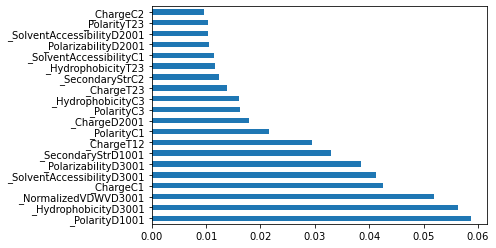

In [17]:
model = RandomForestClassifier(n_jobs=5, random_state=42)
model.fit(X_train, y_train)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
importance = pd.Series(model.feature_importances_, index=headers)
importance.nlargest(20).plot(kind='barh')

In [21]:
# Set up different classifiers

names = ["K-Nearest Neighbors", "Naive Bayes", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma="scale", C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier()]

In [22]:
# Compare different classifiers

for name, clf in zip(names, classifiers):
    model = clf
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test, y_pred)
    print("###### " + name + " #######")
    print("accuracy: {}".format(accuracy))
    print("report:")
    print(report)
    print("------------------------------\n")


###### K-Nearest Neighbors #######
accuracy: 0.7569866342648846
report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1761
           1       0.57      0.62      0.59       708

    accuracy                           0.76      2469
   macro avg       0.71      0.71      0.71      2469
weighted avg       0.76      0.76      0.76      2469

------------------------------

###### Naive Bayes #######
accuracy: 0.7035236938031592
report:
              precision    recall  f1-score   support

           0       0.95      0.61      0.75      1761
           1       0.49      0.93      0.64       708

    accuracy                           0.70      2469
   macro avg       0.72      0.77      0.69      2469
weighted avg       0.82      0.70      0.72      2469

------------------------------

###### Linear SVM #######
accuracy: 0.8849736735520454
report:
              precision    recall  f1-score   support

           0       0.92     

In [24]:
# Cross-Validation
model = RandomForestClassifier()
scores = cross_val_score(model, X_proteins, target_classes, cv=5)
print(scores)

[0.90126582 0.90683544 0.91696203 0.89665653 0.90932118]


In [50]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

param_grid = {"n_estimators": [10, 50, 100],
              "criterion": ["gini", "entropy"],
             }
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100]})

In [52]:
grid_search.score(X_test, y_test)

0.9210206561360875

In [53]:
grid_search.best_score_

0.9042409508373851

In [55]:
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 100}